In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.special
import scipy as sp
from scipy import linalg

Solutions of the 2D Helmholtz equation.
H0norm takes a 2 component vector

In [8]:

def H0(k, r):
    return scipy.special.hankel1(0,k * r)

def H0norm(k, x):
    return scipy.special.hankel1(0,k * np.linalg.norm(x,axis=2))


Firstit might be nice to show that this indeed is a solution of the Helmholtz equation 

In [5]:
# Scattered points
N = 200
p1 = np.random.rand(1,N,2)
p2 = np.random.rand(N,1,2)
p2[:,0,0] += 4

My conjecture is that the rank of the helhmotlz operator ought to be basically the etendue time k^2. 
The following will compute all the piarwise matrix elements of these points

In [11]:
G = H0norm(1,p1-p2)

In [12]:


U, s, Vh = linalg.svd(G)

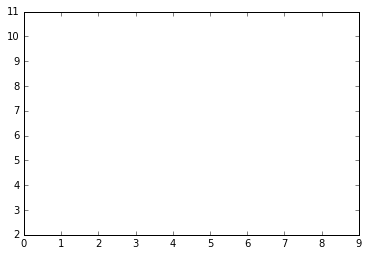

In [19]:
for i in range(10):
    plt.plot([i],np.sum(s>10**(-i)))

(array([ 184.,    2.,    2.,    2.,    1.,    2.,    2.,    2.,    1.,    2.]),
 array([-14.82466354, -13.15230109, -11.47993864,  -9.80757618,
         -8.13521373,  -6.46285128,  -4.79048883,  -3.11812637,
         -1.44576392,   0.22659853,   1.89896098]),
 <a list of 10 Patch objects>)

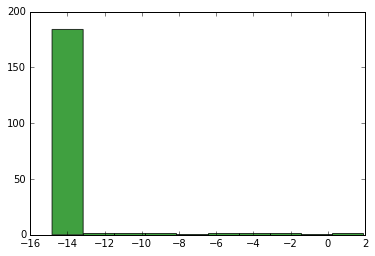

In [22]:
plt.hist(np.log10(s), 10, facecolor='green', alpha=0.75)

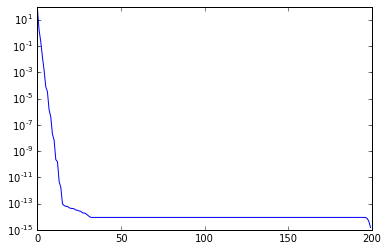

In [26]:
plt.yscale("log")
plt.plot(s)

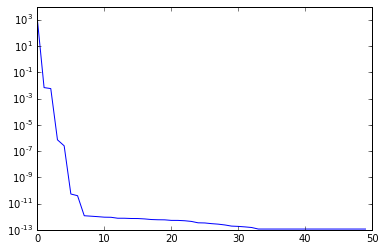

In [55]:
# Scattered points

N = 200
p1 = np.random.rand(1,N,2)
p2 = np.random.rand(N,1,2)
p2[:,0,0] += 40
G = H0norm(0.00001,p1-p2)
U, s, Vh = linalg.svd(G)
 
plt.yscale("log")
plt.plot(s[:50])

Rank does decrease with distance. The k dependenace doesn't make any sense to me

/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


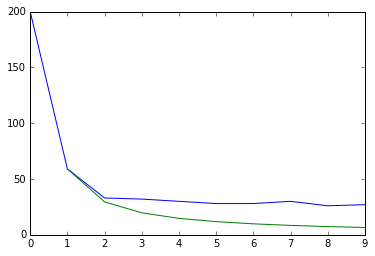

In [65]:
# Scattered points
ranks = np.zeros(10)
for i in range(10):
    N = 200
    p1 = np.random.rand(1,N,2)
    p2 = np.random.rand(N,1,2)
    p2[:,0,0] += i
    G = H0norm(0.01,p1-p2)
    U, s, Vh = linalg.svd(G)
    ranks[i] = np.sum(s>1e-13)

plt.plot(ranks)
plt.plot(ranks[1]/np.arange(10))

/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


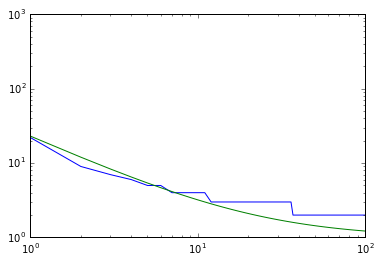

In [77]:
# Scattered points
dist = 100
ranks = np.zeros(dist)
for i in range(dist):
    N = 200
    p1 = np.random.rand(1,N,2)
    p2 = np.random.rand(N,1,2)
    p2[:,0,0] += i
    G = H0norm(30,p1-p2)
    U, s, Vh = linalg.svd(G)
    ranks[i] = np.sum(s>1e-2)
plt.yscale("log")
plt.xscale("log")
plt.plot(ranks)
plt.plot(ranks[1]/np.arange(dist) + 1)


The fit for 1/r dependence isn't bad. up until larger distances where the numbers level out at 10.

But. i should be extremely wary. The fit is really quite bad. at larger distance..
And it is always dipping under at shorter distance. 
The curve just doesn't look like pure power law.

And I could add an offset, but why?

Two more tests
Should be proportional to transverse wdith
and not sensitive to depth of point cloud
Also try in three dimensions
Actually perform the expansion about source and target points
should just be a taylor expansion or fourier series?

paraxial
assume
f ~ e^ikz * g
See what's leftoever. assume seconds derivative of g is small



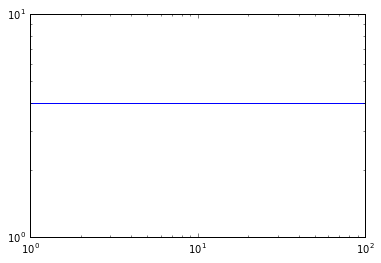

In [78]:
# Scattered points
dist = 100
ranks = np.zeros(dist)
for i in range(dist):
    N = 200
    p1 = np.random.rand(1,N,2)
    p2 = np.random.rand(N,1,2)
    p2[:,0,0] = 10 + i * p2[:,0,0]
    G = H0norm(30,p1-p2)
    U, s, Vh = linalg.svd(G)
    ranks[i] = np.sum(s>1e-12)
plt.yscale("log")
plt.xscale("log")
plt.plot(ranks)
#plt.plot(ranks[1]/np.arange(dist) + 1)

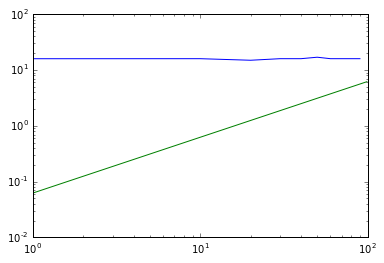

In [96]:
# Scattered points
dist = 100
ranks = []#np.zeros(dist)
for i in range(0,dist,10):
    N = 2000
    p1 = np.random.rand(1,N,2)
    p2 = np.random.rand(N,1,2)
    p2[:,0,0] += 10
    p2[:,0,1] = i * p2[:,0,1]
    G = H0norm(1,p1-p2)
    U, s, Vh = linalg.svd(G)
    ranks.append(np.sum(s>1e-12))
plt.yscale("log")
plt.xscale("log")
plt.plot(range(0,dist,10), ranks)
plt.plot(np.arange(dist)/ranks[1])

In [87]:
list(range(0,10,2))

[0, 2, 4, 6, 8]